In [1]:
import keras
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

Using TensorFlow backend.
c:\users\qaise\anaconda3\envs\tf_gpy\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\qaise\anaconda3\envs\tf_gpy\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\qaise\anaconda3\envs\tf_gpy\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\qaise\anaconda3\envs\tf_gpy\lib\sit

In [2]:
model = keras.models.load_model('dummy_check.model')
model.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
_________________________________________________________________________________________

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
train_data = np.load('Dataset_v1.npy', allow_pickle=True)
x = np.array([i[0] for i in train_data])
y = [i[1] for i in train_data]
lb = LabelBinarizer()
labels = lb.fit_transform(y)
data = np.array(x)
labels = np.array(y)
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25, random_state=42)

In [4]:
pred = []
for i in testX:
    pred.append(np.argmax(model.predict(i.reshape(-1,224,224,3))))
print(len(pred))    

12819


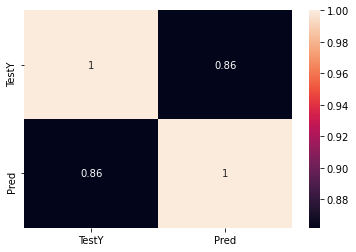

In [5]:
import pandas as pd
df = pd.DataFrame({'TestY':testY,
                  'Pred':np.array(pred)})
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(testY, pred)

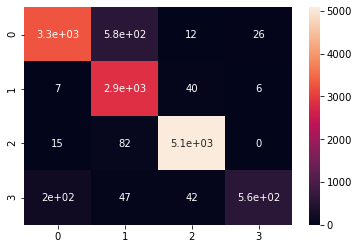

In [8]:
sns.heatmap(conf, annot = True)